<a href="https://colab.research.google.com/github/psGitOrange/Stack-Overflow-Dev-Survey-2023-EDA/blob/main/advanced_data_analysis_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stack Overflow Developer Survey 2023 - Exploratory Data Analysis (EDA)

This is a EDA Project is get some key insights from the latest survey conducted by stack**overflow** [Stack Overflow Developer Survey 2023](https://survey.stackoverflow.co/2023/).

![](https://i.imgur.com/FLsikXN.png)

From past 13 year stack**overflow** is conducting developers survey where they provide **industry-leading insights** regarding the developer community.
- This is used to follow the trends of evolving *developer experience, technologies*.
- This year they have also included the questions realted to *AI/ML* to know users' sentiment and usecase of this new technology.
- This survey was hosted on all channels owned by Stack Overflow, not compulsory but this year **89,184** software developers respondents from 185 countries around the world. Since this survey is in English, not many other native language countries had as many participant as that of USA and Europe.

Stackoverflow survey dataset is hosted on https://insights.stackoverflow.com/survey, it contains archive of the surveys uptil 2023.
To view the official insights provided by stackoverflow visit [Stack Overflow Developer Survey 2023](https://survey.stackoverflow.co/2023/) it provides extensive analysis on the survey realated question, showing key insights from each field.

It is also hosted on kaggle datasets https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2023-developers-survey

In this EDA Project we will do the following:
- Downloading dataset from online sources and storing it locally
- Processing massive datasets using Pandas
- Working with categorical data
- we will do our little own analysis and keep it short.
- Try and replicate some of the insights provided on their official site
- Most the plots can be reused on different columns/responses to get more insights, here we are going to keep it short
- again, you can visit the official website for more

## Importing relevent libraries
- `pandas` and `numpy` for data processing.</br>
- `opendatasets` and `drive` to download and store data locally.</br>
- `matplotlib`,`seaborn`,`plotly.express`, `folium` and `wordcloud` for ploting variety of plots to draw insights.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/mydrive")

Mounted at /content/mydrive


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# import folium
# import wordcloud

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
#We'll use the `od.download` function to download the dataset.
help(od.download)

Help on function download in module opendatasets:

download(dataset_id_or_url, data_dir='.', force=False, dry_run=False, **kwargs)



In [ ]:
#From their official archives survey dataset is available as zip file, containing other related files
dataset_url = 'https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip'

In [ ]:
od.download(dataset_url, '/content/mydrive/MyDrive/Jovian')

20602880it [00:01, 13277896.61it/s]                              


To download the dataset from kaggle, you'll need to supply your Kaggle credentials, as explained here: https://github.com/jovianml/opendatasets#kaggle-credentials

The data has been downloaded and unzipped to the folder `./Jovian`

In [ ]:
!ls -lh /content/mydrive/MyDrive/Jovian/stack-overflow-developer-survey-2023

total 153M
-rw------- 1 root root 2.1K Jun 20 04:39 README_2023.txt
-rw------- 1 root root 1.4M Jun 12 16:34 so_survey_2023.pdf
-rw------- 1 root root 152M Jun 22 08:21 survey_results_public.csv
-rw------- 1 root root  17K Aug 22 16:42 survey_results_schema.csv


Lets view the downloaded and unzipped the data in folder

In [ ]:
!ls -lh /content/mydrive/MyDrive/Jovian/stack-overflow-developer-survey-2023/survey_results_public.csv

-rw------- 1 root root 152M Jun 22 08:21 /content/mydrive/MyDrive/Jovian/stack-overflow-developer-survey-2023/survey_results_public.csv


It consists of four file, we would be using `survey_results_public.csv`,as it contains the results of the survey which is about 152MB in size. We can also check the length of the file using the `wc` terminal command (only works on Linux and Mac).

In [ ]:
!wc -l /content/mydrive/MyDrive/Jovian/stack-overflow-developer-survey-2023/survey_results_public.csv

89185 /content/mydrive/MyDrive/Jovian/stack-overflow-developer-survey-2023/survey_results_public.csv


The file consists of over 89.1 thousand records! You can learn more about the dataset by reading the dataset from their official site `https://insights.stackoverflow.com/survey`

You can find the official published results here:https://survey.stackoverflow.co/2023/ this contains some interesting insights.

We have others files such as survey_results_schema which contains information about columns/fields and so_survey_2023 contains actual survey conducted in pdf format for our reference, to understand about the survey better.

In [ ]:
survey_raw_csv = '/content/mydrive/MyDrive/Jovian/stack-overflow-developer-survey-2023/survey_results_public.csv'
schema_csv = '/content/mydrive/MyDrive/Jovian/stack-overflow-developer-survey-2023/survey_results_schema.csv'

In [ ]:
%%time
survey_raw_df = pd.read_csv(survey_raw_csv)

CPU times: user 2.94 s, sys: 396 ms, total: 3.33 s
Wall time: 5.8 s


In [ ]:
survey_raw_df.head(5)

ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   

                                    CodingActivities  \
0                                                NaN   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   
3  Colleague;Friend or family member;Other online...   
4  Books / Physical media;Online Courses or Certi...   

                                     LearnCodeOnline  ...        Frequency_1  \
0                                                NaN  ...                NaN   
1  Formal documentation provided by the owner of ...  ...   1-2 times a week   
2  Formal documentation provided by the owner of ...  ...  6-10 times a week   
3  Formal documentation provided by the owner of ...  ...   1-2 times a week   
4  Formal documentation provided by the owner of ...  ...   1-2 times a week   

         Frequency_2       Frequency_3         TimeSearching  \
0                NaN               NaN                   NaN   
1   10+ times a week             Never   15-30 minutes a day   
2  6-10 times a week  3-5 times a week   30-60 minutes a day   
3   10+ times a week  1-2 times a week   15-30 minutes a day   
4   1-2 times a week  3-5 times a week  60-120 minutes a day   

         TimeAnswering                                   ProfessionalTech  \
0                  NaN                                                NaN   
1  15-30 minutes a day  DevOps function;Microservices;Automated testin...   
2  30-60 minutes a day  DevOps function;Microservices;Automated testin...   
3  30-60 minutes a day  Automated testing;Continuous integration (CI) ...   
4  30-60 minutes a day  Microservices;Automated testing;Observability ...   

                                            Industry           SurveyLength  \
0                                                NaN                    NaN   
1  Information Services, IT, Software Development...  Appropriate in length   
2  Information Services, IT, Software Development...  Appropriate in length   
3                                                NaN  Appropriate in length   
4                                              Other  Appropriate in length   

                   SurveyEase ConvertedCompYearly  
0                         NaN                 NaN  
1                        Easy            285000.0  
2              

In [ ]:
survey_raw_df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

Since there are too many columns, we will select few at a time and analyse section wise.

As the Survey itself was divided into following section which can be seen from so_survey_2023 file.

There are seven sections in this survey. we will focus on 2nd, 3rd, 4th and 5th sections
in a random order.
1. Basic Information
2. Education, Work, and Career
3. Technology and Tech Culture
4. Stack Overflow Usage + Community
5. Artificial Intelligence
6. Professional Developer Series (Optional)
7. Final Questions

Schema file this time doesn't contain explianation about all the columns, as the data provided by stackover flow is proccessed to some extent.So this can't use it refer much while plotting.

e.g: `'DatabaseHaveWorkedWith','DatabaseWantToWorkWith'` columns are derived from single response given to question "Which database environments have you done extensive development work in over the past year, and which do you want to work in over the next year?"

In [ ]:
schema_df = pd.read_csv(schema_csv, index_col = 'qname')
schema_df

qid                                           question  \
qname                                                                    
S0            QID16  <div><span style="font-size:19px;"><strong>Hel...   
MetaInfo      QID12                                  Browser Meta Info   
Q310         QID310  <div><span style="font-size:19px;"><strong>You...   
Q120         QID312                                                NaN   
S1             QID1  <span style="font-size:22px; font-family: aria...   
...             ...                                                ...   
Knowledge_7  QID289  Waiting on answers to questions often causes i...   
Knowledge_8  QID289  I feel like I have the tools and/or resources ...   
Frequency_1  QID290  Needing help from people outside of your immed...   
Frequency_2  QID290  Interacting with people outside of your immedi...   
Frequency_3  QID290  Encountering knowledge silos (where one indivi...   

            force_resp  type selector  
qname                                  
S0               False    DB       TB  
MetaInfo         False  Meta  Browser  
Q310             False    DB       TB  
Q120              True    MC     SAVR  
S1               False    DB       TB  
...                ...   ...      ...  
Knowledge_7        NaN    MC     MAVR  
Knowledge_8        NaN    MC     MAVR  
Frequency_1        NaN    MC     MAVR  
Frequency_2        NaN    MC     MAVR  
Frequency_3        NaN    MC     MAVR  

[78 rows x 5 columns]

In [ ]:
schema_df.columns

Index(['qid', 'question', 'force_resp', 'type', 'selector'], dtype='object')

In [ ]:
#droping unwanted cols
cols = ['qid', 'force_resp', 'type', 'selector']
schema_df.drop(columns = cols, inplace =True)

In [ ]:
schema_df.loc['Language']

question    Which <b>programming, scripting, and markup la...
Name: Language, dtype: object

In [ ]:
schema_df.question.DevType

'Which of the following describes your current job, the one you do most of the time? Please select only one.'

In [ ]:
#retrieve column as pandas series
schema_raw = schema_df.question
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
Q310           <div><span style="font-size:19px;"><strong>You...
Q120                                                         NaN
S1             <span style="font-size:22px; font-family: aria...
                                     ...                        
Knowledge_7    Waiting on answers to questions often causes i...
Knowledge_8    I feel like I have the tools and/or resources ...
Frequency_1    Needing help from people outside of your immed...
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
Name: question, Length: 78, dtype: object

In [ ]:
schema_raw['Knowledge_4']

'I am able to quickly find answers to my questions with existing tools and resources.'

In [ ]:
print(schema_raw['LearnCode'])
print(schema_raw['BuyNewTool'])
print(schema_raw['NEWSOSites'])

How do you learn to code? Select all that apply.
When buying a new tool or software, how do you discover and research available solutions? Select all that apply.
Which of the following Stack Overflow sites have you visited? Select all that apply. *


## Data Processing and cleaning with pandas

We are dividing survey data using columns into parts to analyse the sections mentioned above.

> First set containing sections
1. Basic Information
2. Education, Work, and Career
3. Technology and Tech Culture
4. Artificial Intelligence

> Second set containing sections
5. Stack Overflow Usage + Community
6. Professional Developer Series (Optional)
7. Final Questions

In [ ]:
#we will be droping few cols as we won't be using them, also we are seperating few cols which we are not interested in
cols = [# Basic Information
       'MainBranch', 'Age', 'Employment', 'RemoteWork','CodingActivities',
       # Education, Work, and Career
       'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro','WorkExp', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country','ConvertedCompYearly',
       # Technology and Tech Culture
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith','DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith','OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       # Artificial Intelligence
       'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen','AIToolInterested in Using', 'AIToolCurrently Using','AIToolNot interested in Using',
       'AINextVery different','AINextNeither different nor similar', 'AINextSomewhat similar','AINextVery similar', 'AINextSomewhat different']

optional_cols = [# Stack Overflow Usage + Community
       'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm'
       # Professional Developer Series (Optional)
       'TBranch', 'ICorPM','WorkExp', 'TimeSearching',
       'TimeAnswering', 'ProfessionalTech', 'Industry',
       # Final Questions'
       'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4','Knowledge_5', 'Knowledge_6', 'Knowledge_7',
       'Knowledge_8','Frequency_1', 'Frequency_2', 'Frequency_3','SurveyLength','SurveyEase']

Here, we are only using the first set of data to do our analysis, it contains categorical and some numerical fileds.


In [ ]:
survey_df = survey_raw_df[cols].copy()

In [ ]:
survey_df.shape

(89184, 56)

Viewing some basic information about the data frame.

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MainBranch                           89184 non-null  object 
 1   Age                                  89184 non-null  object 
 2   Employment                           87898 non-null  object 
 3   RemoteWork                           73810 non-null  object 
 4   CodingActivities                     73764 non-null  object 
 5   EdLevel                              87973 non-null  object 
 6   LearnCode                            87663 non-null  object 
 7   LearnCodeOnline                      70084 non-null  object 
 8   LearnCodeCoursesCert                 37076 non-null  object 
 9   YearsCode                            87435 non-null  object 
 10  YearsCodePro                         66136 non-null  object 
 11  WorkExp                     

Age is also a categorical column in this time of the survey, can be used as bins while plotting histograms.

In [ ]:
survey_df['Age'].unique() # we can use it as categorical variable

array(['18-24 years old', '25-34 years old', '45-54 years old',
       '35-44 years old', 'Under 18 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [ ]:
survey_df['YearsCode'].unique()

array([nan, '18', '27', '12', '6', '21', '4', '5', '20', '14', '10', '15',
       '11', '3', '24', '8', '13', 'Less than 1 year', '16', '33', '22',
       '30', '32', '7', '35', '28', '40', '17', '29', '19',
       'More than 50 years', '9', '38', '26', '34', '25', '2', '45', '23',
       '31', '43', '1', '48', '41', '50', '39', '42', '37', '36', '44',
       '46', '49', '47'], dtype=object)

In [ ]:
survey_df['YearsCodePro'].unique()

array([nan, '9', '23', '7', '4', '21', '3', '15', 'Less than 1 year',
       '10', '2', '6', '14', '5', '19', '13', '16', '28', '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '45', '29', '12', '31', '20',
       '18', '50', '27', '43', '22', '26', '38', '33', '44', '35', '34',
       '37', '42', '41', 'More than 50 years', '47', '36', '39', '48',
       '46', '49'], dtype=object)

Since `YearsCode`, `YearsCodePro` are have few string inputs the datatypes of the column is stored as object datatype, we will convert then to numerical by coverting 'Less than 1 year' to 1 and 'More than 50 years' to 51

But this is not a correct way but an optimal solution as years experience can be 0 or greater than 51 in few cases.

In [ ]:
def convert_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        if 'Less than 1 year' in value.lower():
            return 1  # Convert 'Less than 1 year' to 1
        if 'More than 50 years' in value.lower():
            return 51  # Convert 'More than 50 years' to 51
        return value  # Return original value for non-numeric values

In [ ]:
# Apply the conversion function to the column
survey_df['YearsCode'] = survey_df['YearsCode'].apply(convert_to_numeric)
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].apply(convert_to_numeric)

In [ ]:
#?pd.to_numeric
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce', downcast="integer")
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce', downcast="integer")

In [ ]:
survey_df.describe()

YearsCode  YearsCodePro       WorkExp  ConvertedCompYearly
count  86114.000000  64217.000000  43579.000000         4.801900e+04
mean      13.972049     11.508354     11.405126         1.031101e+05
std       10.259548      9.070346      9.051989         6.814188e+05
min        1.000000      1.000000      0.000000         1.000000e+00
25%        6.000000      5.000000      5.000000         4.390700e+04
50%       11.000000      9.000000      9.000000         7.496300e+04
75%       20.000000     16.000000     16.000000         1.216410e+05
max       50.000000     50.000000     50.000000         7.435143e+07

years code pro and work exp are similar questions.
Giving similar answers, we wil use YearsCodePro for workexp as it has more responses

In [ ]:
survey_df.sample(9)

MainBranch              Age  \
77756  I am a developer by profession  45-54 years old   
69898  I am a developer by profession  35-44 years old   
43769  I am a developer by profession  35-44 years old   
30269  I am a developer by profession  25-34 years old   
38894  I am a developer by profession  25-34 years old   
33825  I am a developer by profession  45-54 years old   
74296  I am a developer by profession  25-34 years old   
72315  I am a developer by profession  35-44 years old   
5372   I am a developer by profession  25-34 years old   

                                              Employment  \
77756                                Employed, full-time   
69898                                Employed, full-time   
43769                                Employed, full-time   
30269                                Employed, full-time   
38894                                Employed, full-time   
33825                                Employed, full-time   
74296                                Employed, full-time   
72315                                Employed, full-time   
5372   Independent contractor, freelancer, or self-em...   

                                 RemoteWork  \
77756                                Remote   
69898  Hybrid (some remote, some in-person)   
43769  Hybrid (some remote, some in-person)   
30269  Hybrid (some remote, some in-person)   
38894                             In-person   
33825                                Remote   
74296                             In-person   
72315  Hybrid (some remote, some in-person)   
5372                                 Remote   

                                        CodingActivities  \
77756                       I don’t code outside of work   
69898           Hobby;Contribute to open-source projects   
43769  Hobby;Professional development or self-paced l...   
30269  Hobby;Professional development or self-paced l...   
38894                       I don’t code outside of work   
33825  Hobby;Professional development or self-paced l...   
74296                                              Hobby   
72315  Hobby;Professional development or self-paced l...   
5372   Professional development or self-paced learnin...   

                                                 EdLevel  \
77756    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
69898       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
43769     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
30269       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
38894    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
33825       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
74296  Some college/university study without earning ...   
72315       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5372                                      Something else   

                                               LearnCode  \
77756  Books / Physical media;Colleague;Other online ...   
69898  Colleague;On the job training;Other online res...   
43769  Books / Physical media;Online Courses or Certi...   
30269  Books / Physical media;Colleague;Online Course...   
38894  Books / Physical media;Colleague;Other online ...   
33825  Online Courses or Certification;On the job tra...   
74296  Books / Physical media;Online Courses or Certi...   
72315  Online Courses or Certification;On the job tra...   
5372   Online Courses or Certification;On the job tra...   

                                         LearnCodeOnline LearnCodeCoursesCert  \
77756  Formal documentation provided by the owner of ...                  NaN   
69898  Formal documentation provided by the owner of ...                  NaN   
43769  Formal documentation provided by the owner of ...         edX;Coursera   
30269  Formal documentation provided by the owner of ...          Pluralsight   
38894  Formal documentation provided by the owner of ...                  NaN   
33825  How-to videos;Interactive tutorial;Programming...     Codecademy;Udemy   
7429

> Saving and Retrieving the processed dataset. This is beneficial as we wont have to download, load and proccess data again and again if we wish to work back on the data for gathering different analysis.

In [ ]:
survey_df.to_csv('/content/mydrive/MyDrive/Jovian/survey_df.csv', index = False)

In [ ]:
survey_df = pd.read_csv('/content/mydrive/MyDrive/Jovian/survey_df.csv')

In [ ]:
survey_df.iloc[:,19:26]

LanguageHaveWorkedWith  \
0                                                    NaN   
1                             HTML/CSS;JavaScript;Python   
2                             Bash/Shell (all shells);Go   
3      Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                         HTML/CSS;JavaScript;TypeScript   
...                                                  ...   
89179            HTML/CSS;Java;JavaScript;SQL;TypeScript   
89180                               Dart;Java;Python;SQL   
89181  Assembly;Bash/Shell (all shells);C;C#;Python;R...   
89182  Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...   
89183                    C#;Go;JavaScript;SQL;TypeScript   

                                  LanguageWantToWorkWith  \
0                                                    NaN   
1      Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...   
2                                     Haskell;OCaml;Rust   
3      Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...   
4             HTML/CSS;JavaScript;Python;Rust;TypeScript   
...                                                  ...   
89179  Bash/Shell (all shells);C;Go;HTML/CSS;JavaScri...   
89180              Java;JavaScript;Python;SQL;TypeScript   
89181                                        Python;Rust   
89182  Bash/Shell (all shells);HTML/CSS;JavaScript;Po...   
89183                    C#;Go;JavaScript;SQL;TypeScript   

                                  DatabaseHaveWorkedWith  \
0                                                    NaN   
1                                               Supabase   
2                                                    NaN   
3                                       PostgreSQL;Redis   
4              BigQuery;Elasticsearch;MongoDB;PostgreSQL   
...                                                  ...   
89179                    MongoDB;MySQL;PostgreSQL;SQLite   
89180                                         PostgreSQL   
89181                                             SQLite   
89182  MariaDB;Microsoft SQL Server;MongoDB;MySQL;Red...   
89183                  Microsoft SQL Server;Redis;SQLite   

                                  DatabaseWantToWorkWith  \
0                                                    NaN   
1                    Firebase Realtime Database;Supabase   
2                                                    NaN   
3                                       PostgreSQL;Redis   
4        Elasticsearch;MongoDB;PostgreSQL;Redis;Supabase   
...                                                  ...   
89179                                  PostgreSQL;SQLite   
89180                                         PostgreSQL   
89181                                                NaN   
89182  Cassandra;Cosmos DB;Dynamodb;MariaDB;Microsoft...   
89183                  Microsoft SQL Server;Redis;SQLite   

                                  PlatformHaveWorkedWith  \
0                                                    NaN   
1               Amazon Web Services (AWS);Netlify;Vercel   
2      Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                      Cloudflare;Heroku   
4      Amazon Web Services (AWS);Firebase;Heroku;Netl...   
...                                                  ...   
89179  Digital Ocean;Firebase;Google Cloud;Heroku;Vercel   
89180                                                NaN   
89181                          Amazon Web Services (AWS)   
89182  Amazon Web Services (AWS);Cloudflare;Google Cl...   
89183                                            Hetzner   

                                  PlatformWantToWorkWith  \
0                                                    NaN   
1                                  Fly.io;Netlify;Render   
2                                                    NaN   
3                                      Cloudflare;Heroku   
4      Amazon Web Services (AWS);Cloudflare;Digital O...   
...                                                  ...   
89179    

## Exploratory Analysis and Visualization

### Country
We must first view the respondents' demographics to get a sense of data if there are any biases in data, Here we are plotting the no. of responses from each countries using barplot and foliumn's choropleth.

In [ ]:
#Preseting some basic plot asthetics
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
survey_df.Country.nunique()

185

In [ ]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Italy                                                    1835
Spain                                                    1834
Sweden                                                   1641
Switzerland                                              1149
Russian Federation                                       1094
Name: Country, dtype: int64

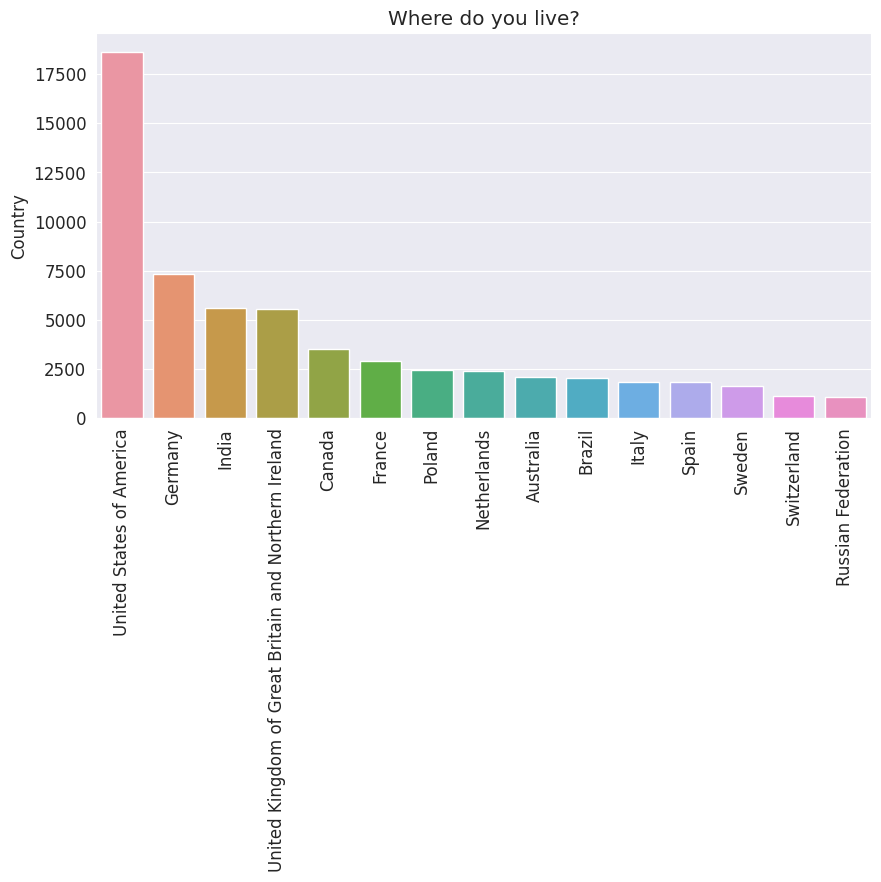

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Where do you live?')
sns.barplot(x=top_countries.index, y=top_countries);

In [ ]:
#download geojson file required to plot choropleth.
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
od.download(countries_geojson, '/content/mydrive/MyDrive/Jovian')

262144it [00:00, 2370510.74it/s]                            


In [ ]:
import json
with open('/content/mydrive/MyDrive/Jovian/countries.geo.json', 'r') as json_file:
  data = json.load(json_file)

In [ ]:
country_counts = survey_df.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df

Country  Count
0                             United States of America  18647
1                                              Germany   7328
2                                                India   5625
3    United Kingdom of Great Britain and Northern I...   5552
4                                               Canada   3507
..                                                 ...    ...
180                              Saint Kitts and Nevis      1
181                                   Marshall Islands      1
182                                              Samoa      1
183                           Central African Republic      1
184                                         San Marino      1

[185 rows x 2 columns]

we have to check the if country names are same as that in geojson file, otherwise the regions wont be mapped accordingly in plot.

In [ ]:
surveyed_countries = survey_df.Country.unique()
surveyed_countries = surveyed_countries[1:] #removed nan value
surveyed_countries = sorted(surveyed_countries)
surveyed_countries

In [ ]:
countries_list = []
for feature in data["features"]:
   countries_list.append(feature["properties"]["name"])
countries_list = sorted(countries_list)
countries_list

In [ ]:
#Russia is present as Russian Federation in our dataset
country_counts_df.at[14, 'Country']= 'Russia'

In [ ]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 100, 1000, 2000, 5000, 7000, 9000, 19000],
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

m

###Age
Analysing Age of the respondents participated in the survey. 25-34 aged users have responded the most around 25% of the responses.

In [ ]:
px.histogram(survey_df, x="Age", marginal="box", title='Age of Respondents')

###Employment
Analysing the developers reponded on their employment status. Around 60% of the developers are employed full time. Meaning this survey has higher possibilites providing the real insights into industry trends.

In [ ]:
result_df = survey_df.Employment.to_frame()
result_df

Employment
0                                                    NaN
1                                    Employed, full-time
2                                    Employed, full-time
3                                    Employed, full-time
4      Employed, full-time;Independent contractor, fr...
...                                                  ...
89179  Employed, full-time;Independent contractor, fr...
89180             Student, full-time;Employed, part-time
89181                                I prefer not to say
89182             Employed, part-time;Student, part-time
89183                                Employed, full-time

[89184 rows x 1 columns]

We are using a helper function here to split a values of a column containing values from multiple choice questions.

It splits the response of responded and places them in a categories as true.

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

Employment type shouldn't have been a multiple choice question, as user could have identified themselves into one of the categories.

In [ ]:
employment_type = split_multicolumn(survey_df.Employment)
employment_type

Employed, full-time  \
0                    False   
1                     True   
2                     True   
3                     True   
4                     True   
...                    ...   
89179                 True   
89180                False   
89181                False   
89182                False   
89183                 True   

       Independent contractor, freelancer, or self-employed  \
0                                                  False      
1                                                  False      
2                                                  False      
3                                                  False      
4                                                   True      
...                                                  ...      
89179                                               True      
89180                                              False      
89181                                              False      
89182                                              False      
89183                                              False      

       Not employed, but looking for work  Student, full-time  \
0                                   False               False   
1                                   False               False   
2                                   False               False   
3                                   False               False   
4                                   False               False   
...                                   ...                 ...   
89179                               False               False   
89180                               False                True   
89181                               False               False   
89182                               False               False   
89183                               False               False   

       Employed, part-time  Student, part-time  I prefer not to say  Retired  \
0                    False               False                False    False   
1                    False               False                False    False   
2                    False               False                False    False   
3                    False               False                False    False   
4                    False               False                False    False   
...                    ...                 ...                  ...      ...   
89179                False               False                False    False   
89180                 True               False                False    False   
89181                False               False                 True    False   
89182                 True                True                False    False   
89183                False               False                False    False   

       Not employed, and not looking for work  
0                                       False  
1                                       False  
2                                       False  
3                                       False  
4                                       False  
...                                       ...  
89179                                   False  
89180                                   False  
89181                                   False  
89182                                   False  
89183                                   False  

[89184 rows x 9 columns]

In [ ]:
employment_status = employment_type.sum().sort_values(ascending=False)
employment_status

Employed, full-time                                     60899
Independent contractor, freelancer, or self-employed    13988
Student, full-time                                      11768
Employed, part-time                                      5029
Not employed, but looking for work                       4178
Student, part-time                                       3390
Not employed, and not looking for work                   1380
Retired                                                   737
I prefer not to say                                       549
dtype: int64

In [ ]:
emp_status_pct = (employment_status/employment_status.sum())*100
emp_status_pct

Employed, full-time                                     59.752939
Independent contractor, freelancer, or self-employed    13.724759
Student, full-time                                      11.546537
Employed, part-time                                      4.934359
Not employed, but looking for work                       4.099374
Student, part-time                                       3.326203
Not employed, and not looking for work                   1.354030
Retired                                                  0.723130
I prefer not to say                                      0.538668
dtype: float64

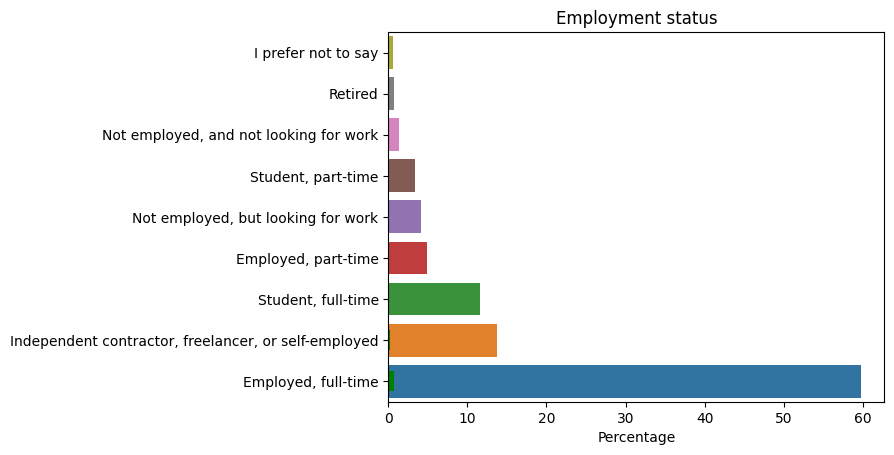

In [ ]:
sns.barplot(x=emp_status_pct, y = emp_status_pct.index)
employment_status.plot(kind='barh', color='g')
plt.title('Employment status')
plt.xlabel('Percentage');

Using World Could to get the most trendiest word in the indutry catch an eye of the viewers.

In [ ]:
from wordcloud import WordCloud

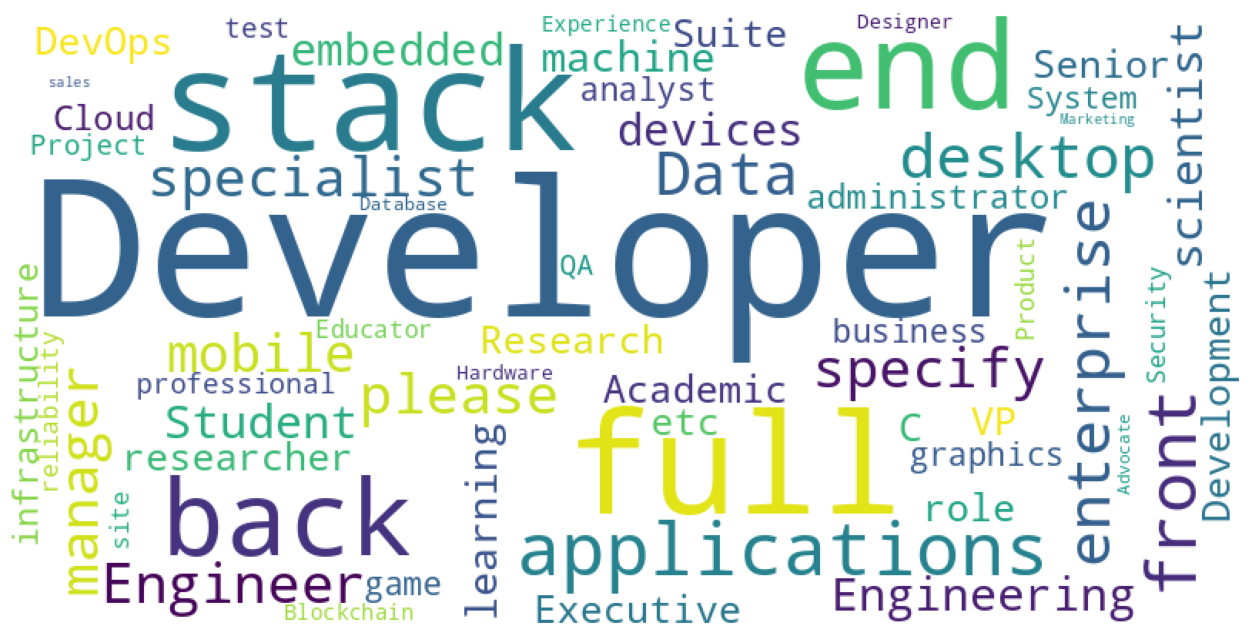

In [ ]:
words = ' '.join((job for job in survey_df.DevType.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

### LearntoCode
Analysing Education level using countplot to view respondents qualification. it is seen most of the IT proffesional have B.Tech Graduates, around 55% of those graduates pursue Masters degree.

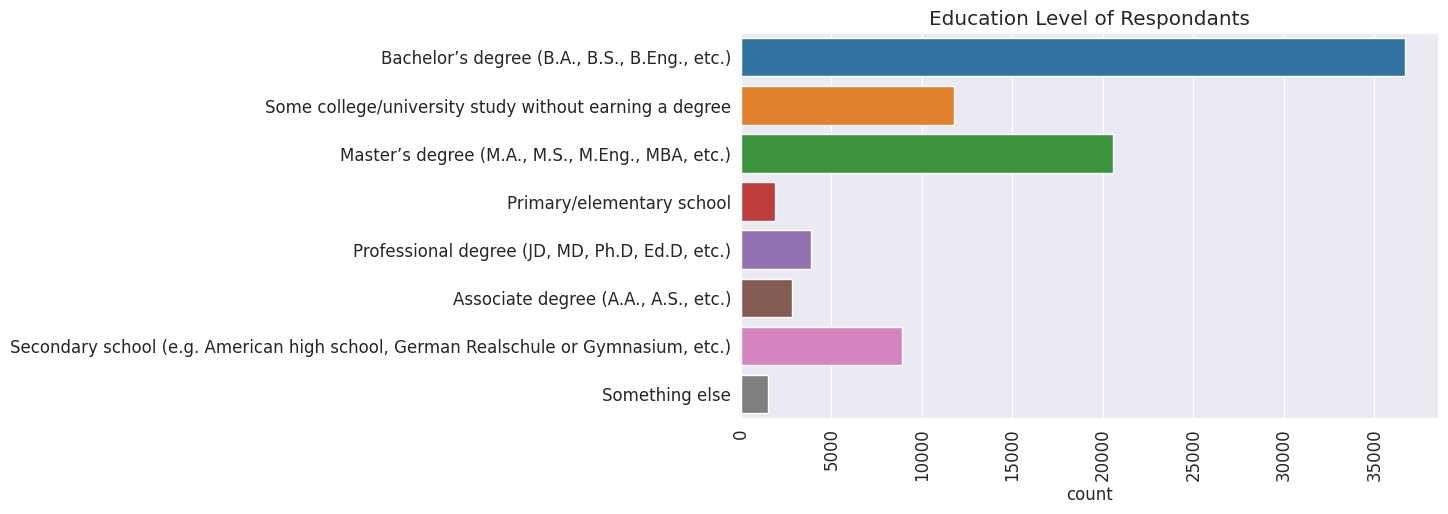

In [ ]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=90);
plt.title('Education Level of Respondants')
plt.ylabel(None);

Learn to code is also a multiple choice question hence we need to split column before plotting.

Most of the Developers have learned through online resources, showcasing the materials required to become IT professional is all over the internet. But surely they first learned the basics in schools.

In [ ]:
learntocode= split_multicolumn(survey_df.LearnCode)
learntocode_pct = learntocode.mean().sort_values(ascending = False)*100
# learntocode.rename(columns ={'Hackathons (virtual or in-person)': 'Hackathons (virtual/in-person)' ,'Online Courses or Certification' :'Online Courses/Certification',
                            #  'Other online resources (e.g., videos, blogs, forum)': 'videos, blogs, forum, etc.', 'School (i.e., University, College, etc)': 'School,College,University,etc' })

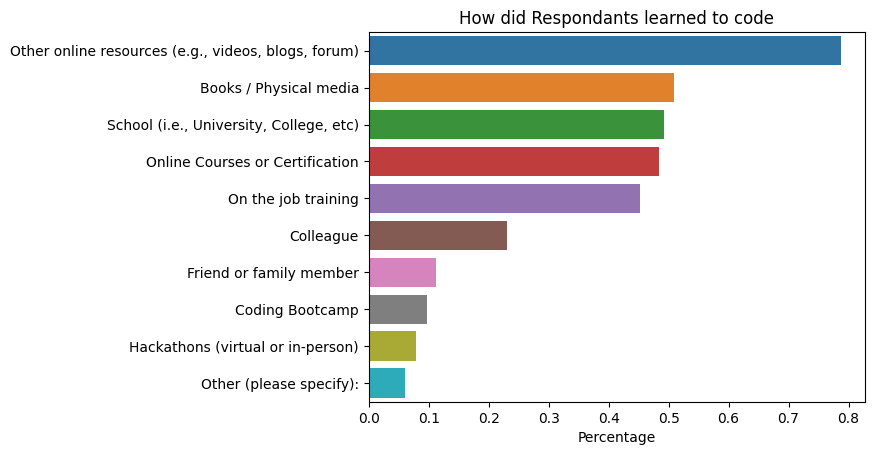

In [ ]:
sns.barplot(x=learntocode_pct, y=learntocode_pct.index)
plt.title('How did Respondants learned to code')
plt.ylabel(None);
plt.xlabel('Percentage');

### Salary
Analysing Salary with Age, coding experience as professional and by developer type.

Stackoverflow has done some preproccesing on the responses received for monthly salary received in their local currency to yearl compensation in USD.

In [ ]:
survey_df['ConvertedCompYearly'].describe()

count    4.801900e+04
mean     1.031101e+05
std      6.814188e+05
min      1.000000e+00
25%      4.390700e+04
50%      7.496300e+04
75%      1.216410e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64

Mean of `ConvertedCompYearly` is greater than median, it is right skewed, hence we will remove some percent of data containing outliers. Stackoverflow has removed 1% of the data where salary is too high or low.

Here removing 0.01% of the data using `'quantile'` function. removing top 0.005% and bottom 0.005% of the compensation.

In [ ]:
#removing 0.1% of the data
survey_df = survey_df[survey_df['ConvertedCompYearly']<=survey_df['ConvertedCompYearly'].quantile(0.995)]
survey_df = survey_df[survey_df['ConvertedCompYearly']>=survey_df['ConvertedCompYearly'].quantile(0.005)]

Salary distribution of the developers by Age. There are many outliers in each age category but the mean salary seeem to increse with increasing age.
But still the isn't much difference between age groups above 24-34, showcasing some it proffesions and job roles provide high compensional irrespective to age.


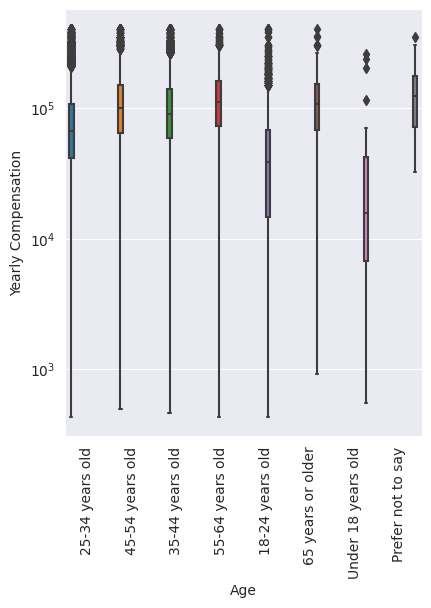

In [ ]:
g = sns.catplot(x='Age', y='ConvertedCompYearly',kind= 'box',
                hue ='Age', data = survey_df)
g.set(yscale = 'log')
plt.xlabel("Age")
plt.xticks(rotation = 90)
plt.ylabel("Yearly Compensation")
plt.show();

Using Plotly Express scatter function to create a scatterpot between mean salary received by proffesional on their job roles based on experience.

In [ ]:
dev_salary = survey_df.groupby('DevType', as_index=False).agg({'ConvertedCompYearly': 'median', 'YearsCodePro': 'mean'})
dev_salary.drop(31, inplace=True)

In [ ]:
fig = px.scatter(dev_salary, x ='YearsCodePro', y = 'ConvertedCompYearly', text = 'DevType', color='DevType')
fig.update_layout(title = 'Salary and experience by developer type', xaxis_title="Average years of professional experience",
                  yaxis_title="Median yearly salary(USD)", legend_title="Developer Type", showlegend=False )
fig.update_traces(textposition='top center')
fig.show()

### Languages admired and desired
 To better gauge hype versus reality, we created a visualization that shows the distance between the proportion of respondents who want to use a technology (“desired”) and the proportion of users that have used the same technology in the past year and want to continue using it (“admired”).

 These are new type of plots replacing previous loved, dreaded and wanted plots plotted on different fields, here languages used by developers.

In [ ]:
languages_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
languages_desired_df = split_multicolumn(survey_df.LanguageWantToWorkWith)

In [ ]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript                 62.467483
HTML/CSS                   52.022784
Python                     48.392088
SQL                        47.792205
TypeScript                 38.169403
Bash/Shell (all shells)    31.789334
Java                       30.002018
C#                         27.127063
C++                        22.015160
C                          18.994438
PHP                        18.247668
PowerShell                 13.345443
Go                         12.997847
Rust                       12.812836
Kotlin                      8.897336
Ruby                        6.115447
Lua                         5.983136
Dart                        5.912496
Assembly                    5.329431
Swift                       4.565841
R                           4.150969
Visual Basic (.Net)         4.000718
MATLAB                      3.743945
VBA                         3.483809
Groovy                      3.336921
Delphi                      3.174336
Scala                       2.715734
P

In [ ]:
languages_desired_percentages = languages_desired_df.mean().sort_values(ascending=False) * 100
languages_desired_percentages

JavaScript                 39.229010
Python                     38.925144
TypeScript                 36.167922
HTML/CSS                   33.557589
SQL                        33.187567
Rust                       29.949318
C#                         20.847910
Bash/Shell (all shells)    20.495829
Go                         20.175144
Java                       16.128454
C++                        15.956898
Kotlin                     11.838446
C                          11.245291
PHP                         8.985917
PowerShell                  6.886886
Dart                        6.790456
Swift                       6.040321
Ruby                        4.813644
Lua                         4.577054
Elixir                      4.350556
Assembly                    4.294492
Zig                         4.089299
Haskell                     3.767492
R                           3.440079
Scala                       3.105938
Julia                       2.448870
F#                          2.355804
D

- Create a new data frame `languages_admired_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_desired_df` are both `True`
- Take the column-wise sum of `languages_admired_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "admire" the language
- Sort the results in decreasing order and plot a horizontal bar graph.
- This plot is dataframe is same as what we would create for most loved languages

In [ ]:
languages_admired_df = languages_worked_df & languages_desired_df
languages_admired_percentages = (languages_admired_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)
languages_admired_percentages

Rust                       84.659141
Elixir                     73.126233
TypeScript                 71.704709
Zig                        71.330590
Clojure                    68.506787
Python                     65.522035
Raku                       65.384615
SQL                        64.258734
GDScript                   62.943144
C#                         62.865292
Julia                      62.772277
Delphi                     62.769339
Go                         62.448240
HTML/CSS                   61.904043
Swift                      61.419450
Kotlin                     60.768746
Bash/Shell (all shells)    60.385877
Dart                       58.562488
JavaScript                 57.827000
F#                         57.361602
Erlang                     55.184332
Lisp                       54.545455
OCaml                      53.908795
Nim                        53.776435
Scala                      52.270851
Haskell                    52.214325
C++                        49.770806
C

To create line connecting the points admired and desired we are using below code. It creates a dataframe containing a category for line_x and point representing it in line_y column, a category is repeated twice in dataframe to represent respective points of admired and desired followed by a nan value which is required to break the line after plotting a line for a category.

In [ ]:
data = {"line_x": [], "line_y": []}
for lang in languages_admired_percentages.index:
  data['line_x'].extend([
    languages_admired_percentages.loc[lang],
    languages_desired_percentages.loc[lang],
    None])
  data['line_y'].extend([lang,lang,None])
data

In [ ]:
fig = go.Figure(
    data=[
        go.Scatter(
            x=data["line_x"],
            y=data["line_y"],
            mode="lines",
            showlegend=False,
            marker=dict(
                color="grey"
            )
        ),
         go.Scatter(
            x=languages_admired_percentages,
            y=languages_admired_percentages.index,
            mode="markers",
            name="admired",
            marker=dict(
                color="blue",
                size=10
            )

        ),
        go.Scatter(
            x=languages_desired_percentages,
            y=languages_desired_percentages.index,
            mode="markers",
            name="desired",
            marker=dict(
                color="orange",
                size=10
            )
        ),
    ])

According to recent survey the most admired language by developers is Rust, and desired languge is Javascript standing at above 80% and 40% respectively.

In [ ]:
fig.update_layout(
    width=600,
    height=600,
    xaxis_title='Percentage',
    yaxis_title='Programming Languages',
    legend_title='Legend',
)
fig.show()

### Exploring AI related fields
We are analysing the sentiment towards these new tools and usage of thes tools

In [ ]:
survey_df.AIAcc

0                                                      NaN
1                                   Other (please explain)
2                                                      NaN
3                                                      NaN
4        Increase productivity;Greater efficiency;Speed...
                               ...                        
89179    Increase productivity;Greater efficiency;Speed...
89180                                    Speed up learning
89181                                                  NaN
89182    Increase productivity;Greater efficiency;Speed...
89183    Increase productivity;Greater efficiency;Speed...
Name: AIAcc, Length: 89184, dtype: object

In [ ]:
ai_sent= split_multicolumn(survey_df['AISent'])
ai_sent_pct = ai_sent.mean().sort_values(ascending=False) * 100
ai_sent_pct

Favorable           33.484706
Very favorable      19.117779
Indifferent         11.377601
Unsure               2.770676
Unfavorable          1.903929
Very unfavorable     0.304987
dtype: float64

Below pie plot shows the sentiment towards upcoming AI Tools. Generating positive sentiments 'favourable' and 'very favourable' response from users when asked if they are gonna use AI Tools.

In [ ]:
fig = px.pie(values=ai_sent_pct, names=ai_sent_pct.index, title='AI tool sentiment')
fig.show()

In [ ]:
ai_acc= split_multicolumn(survey_df['AIAcc'])
ai_acc_pct = ai_acc.mean().sort_values(ascending=False) * 100
ai_acc_pct

Increase productivity         36.451606
Speed up learning             27.962415
Greater efficiency            27.739281
Improve accuracy in coding    14.788527
Improve collaboration          4.172273
Other (please explain)         2.389442
dtype: float64

Below pie plot shows the benefits gained by users using AI Tools

In [ ]:
fig = px.pie(values=ai_acc_pct, names=ai_acc_pct.index, title='Benefits of AI tool')
fig.update_layout(showlegend=False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
ai_ben= split_multicolumn(survey_df['AIBen'])
ai_ben_pct = ai_ben.mean().sort_values(ascending=False) * 100
ai_ben_pct = pd.DataFrame({'AIBen': ai_ben_pct.index, 'Percentage': ai_ben_pct.values})

In [ ]:
ai_ben_pct

AIBen  Percentage
0              Somewhat trust   27.054180
1  Neither trust nor distrust   21.121502
2           Somewhat distrust   14.946627
3             Highly distrust    3.756279
4                Highly trust    1.963357

Below pie plot shows the users trust towards AI Tools. Users are showing very low trust around 42% on the use of AI Tools

In [ ]:
fig = px.pie(ai_ben_pct, names='AIBen', values='Percentage', title='Trust on AI tool')
fig.update_layout(showlegend=False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

We have also plotted a donut chart showing the current uses of AI Tools. 50% of the response says they are using it to writing and debugging code.

In [ ]:
ai_use= split_multicolumn(survey_df['AIToolCurrently Using'])
ai_use_pct = ai_use.mean().sort_values(ascending=False) * 100
ai_use_pct = pd.DataFrame({'AIUse': ai_use_pct.index, 'Percentage': ai_use_pct.values})
fig = px.pie(ai_use_pct, names='AIUse', values='Percentage', title='AI Tool Currently Using For', hole=0.4)
fig.update_layout(showlegend=False)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

Below we have again plotted the admired and desired plot to analyse the AIDev tools. GitHub Copilot tool is the most admired and desired, surpassing any other AI tool in present.

In [ ]:
AIDev_worked_df = split_multicolumn(survey_df.AIDevHaveWorkedWith)
AIDev_desired_df = split_multicolumn(survey_df.AIDevWantToWorkWith)

In [ ]:
AIDev_worked_percentages = AIDev_worked_df.mean().sort_values(ascending=False) * 100
AIDev_worked_percentages

GitHub Copilot        24.755562
Tabnine                5.822793
AWS CodeWhisperer      2.322165
Synk Code              0.603247
Codeium                0.565124
Whispr AI              0.510181
Replit Ghostwriter     0.375628
Mintlify               0.236590
Adrenaline             0.195102
Rubber Duck.AI         0.169313
dtype: float64

In [ ]:
AIDev_desired_percentages = AIDev_desired_df.mean().sort_values(ascending=False) * 100
AIDev_desired_percentages

GitHub Copilot        19.402583
AWS CodeWhisperer      3.415411
Tabnine                2.484751
Whispr AI              0.920569
Replit Ghostwriter     0.621188
Codeium                0.599883
Synk Code              0.593156
Rubber Duck.AI         0.404781
Adrenaline             0.303866
Mintlify               0.283683
dtype: float64

In [ ]:
AIDev_admired_df = AIDev_worked_df & AIDev_desired_df
AIDev_admired_percentages = (AIDev_admired_df.sum() * 100/ AIDev_worked_df.sum()).sort_values(ascending=False)
AIDev_admired_percentages

GitHub Copilot        72.316333
Codeium               65.079365
Whispr AI             54.725275
AWS CodeWhisperer     52.679865
Mintlify              52.132701
Synk Code             51.858736
Adrenaline            50.574713
Rubber Duck.AI        48.344371
Replit Ghostwriter    43.283582
Tabnine               36.529944
dtype: float64

In [ ]:
data = {"line_x": [], "line_y": []}
for aidev in AIDev_admired_percentages.index:
  data['line_x'].extend([
    AIDev_admired_percentages.loc[aidev],
    AIDev_desired_percentages.loc[aidev],
    None])
  data['line_y'].extend([aidev,aidev,None])

In [ ]:
fig = go.Figure(
    data=[
        go.Scatter(
            x=data["line_x"],
            y=data["line_y"],
            mode="lines",
            showlegend=False,
            marker=dict(
                color="grey"
            )
        ),
         go.Scatter(
            x=AIDev_admired_percentages,
            y=AIDev_admired_percentages.index,
            mode="markers",
            name="admired",
            marker=dict(
                color="blue",
                size=10
            )

        ),
        go.Scatter(
            x=AIDev_desired_percentages,
            y=AIDev_desired_percentages.index,
            mode="markers",
            name="desired",
            marker=dict(
                color="orange",
                size=10
            )
        ),
    ])

In [ ]:
fig.update_layout(
    width=600,
    height=600,
    xaxis_title='Percentage',
    yaxis_title='AI Developer Tools',
    legend_title='Legend',
)
fig.show()

## Inferences and Conclusion
- We have used different plotting libraries namely matplotlib, seaborn, plotly, folium, wordcloud for exploring and analysing our data.

- We drew some insights on demographics
plotted some realtionships with salary
build a dumbell plot.

- Some insights on use of ai

## Future Work
- There are still many insights which haven't been covered, most of the insights can just be replicated using the same code for differents fields. This can be used to draw insights on the interested fields.

- We haven't made other popular charts from this years survey, chord chart for analysing between worked with and want to work with column, percentage bargraphs for analysing category percentage response based other category.

## References
Check out the following resources to learn more about the tools used in this EDA project.
- Pandas documentation: https://pandas.pydata.org/docs/user_guide/index.html  
- Matplotlib documentation: https://matplotlib.org/stable/index.html
- seaborn homepage: https://seaborn.pydata.org/
- Plotly express documentation: https://plotly.com/python/plotly-express/
- Folium: https://pypi.org/project/folium/0.1.5/
- Wordcloud: https://pypi.org/project/wordcloud/
- opendatasets Python library: https://github.com/JovianML/opendatasets